### Infopillar Solution ML Internship Task-3

## Iris Flowers Classification

### By Apurva Acharya

   *Iris, (genus Iris)*, genus of about 300 species of plants in the family Iridaceae, including some of the world’s most popular and varied garden flowers. 
   The diversity of the genus is centred in the north temperate zone, though some of its most handsome species are native to the Mediterranean and central Asian areas.

The project involves:
* Importing necessary Modules and Libraries
* Import Dataset
* Looking for null values
* Looking for outliers
* Univariate Analysis
* Correlation Matrix
* Bivariate Analysis
* Separating dataset into training and testing dataset
* Modeling

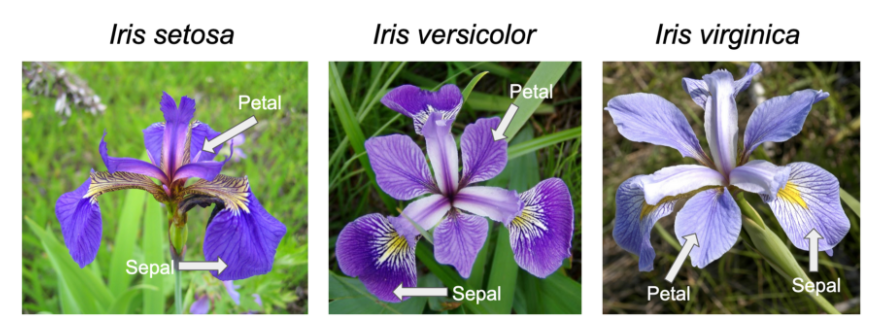

### Import necessary modules and libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [20]:
data=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [21]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [22]:
data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [23]:
columns=['sepal_length','sepal_width','petal_length','petal_width','species']

In [24]:
data.columns=columns

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [26]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The given dataset has 149 rows and 5 columns.

### Looking for null values

In [27]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

The dataset has no null values.

### Looking for outliers

<AxesSubplot:>

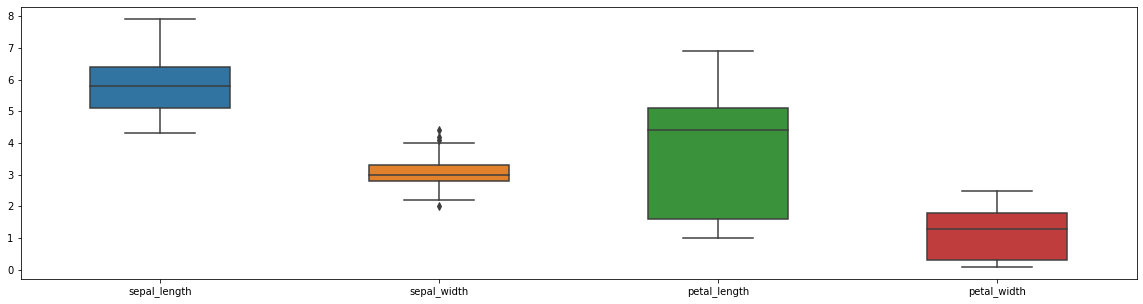

In [28]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data,width=0.5)

There are no significant outliers in the dataset.

### Univariate Analysis

<AxesSubplot:xlabel='sepal_length', ylabel='count'>

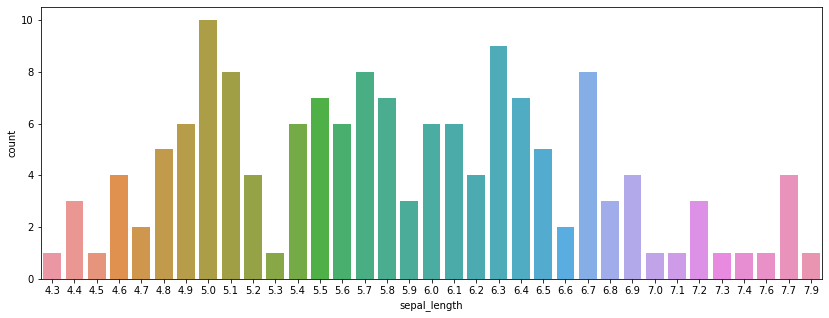

In [29]:
plt.figure(figsize=(14,5))
sns.countplot(x="sepal_length",data=data)

The most frequent sepal length is 5.0 followed by 6.3, while 7.0, 7.2, 7.3 appear to be the lowest. 

<AxesSubplot:xlabel='sepal_width', ylabel='count'>

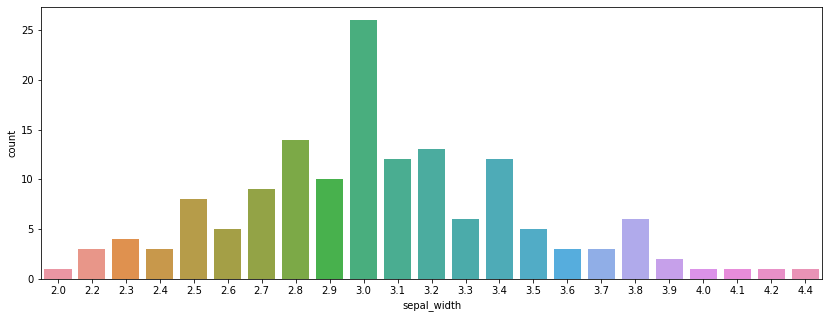

In [30]:
plt.figure(figsize=(14,5))
sns.countplot(x="sepal_width",data=data)

The most prevalent sepal width is 3.0 cm

<AxesSubplot:xlabel='petal_length', ylabel='count'>

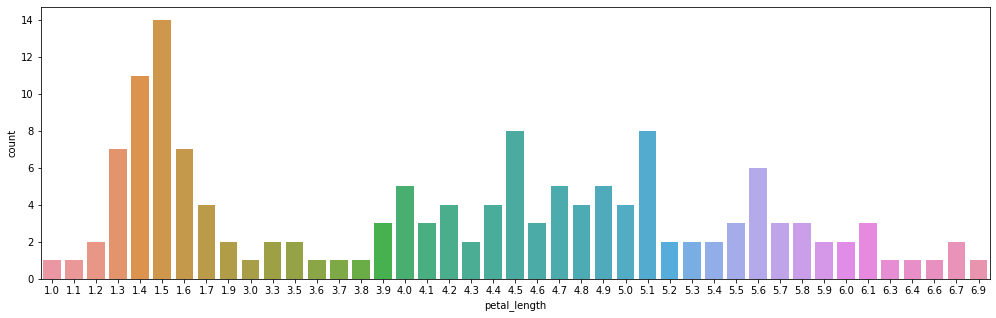

In [31]:
plt.figure(figsize=(17,5))
sns.countplot(x="petal_length",data=data)

<AxesSubplot:xlabel='petal_width', ylabel='count'>

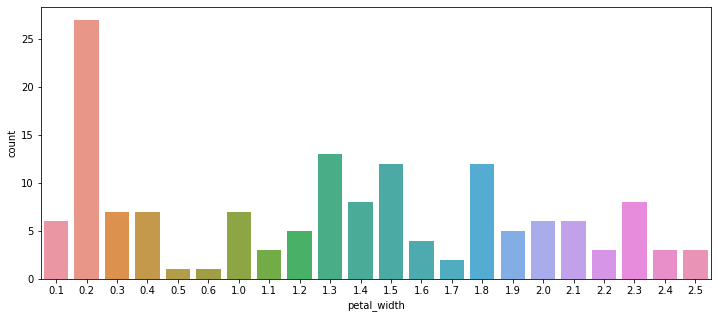

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x="petal_width",data=data)

The most prevalent petal width is 0.2.

### Correlation Matrix

<AxesSubplot:>

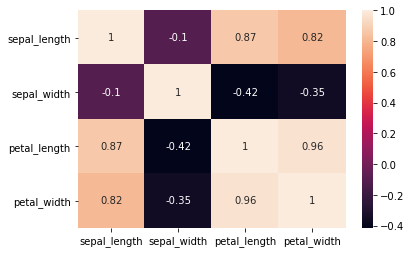

In [33]:
corr=data.corr()
sns.heatmap(corr,annot=True)

From the heatmap, it is clear that there is strong correlation between petal length and petal width.

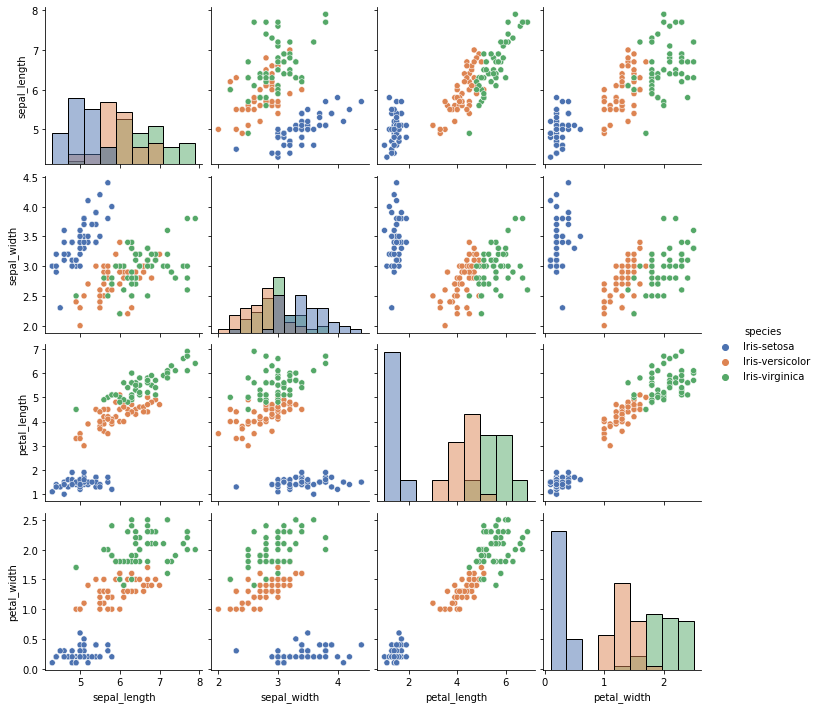

In [34]:
sns.pairplot(data=data,hue='species',palette='deep',diag_kind='hist')

### Bivariate Analysis

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

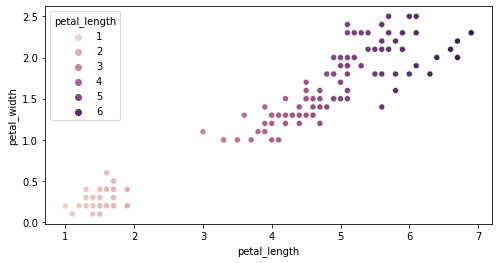

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'petal_length', y = 'petal_width',hue='petal_length', data = data)

We can see that petal length and petal width are directly proportional.

<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

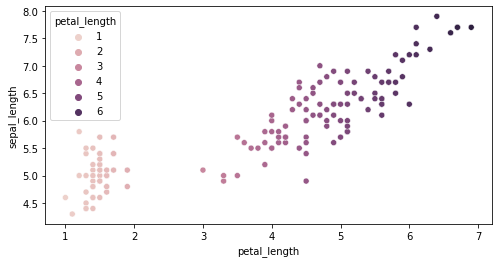

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'petal_length', y = 'sepal_length',hue='petal_length', data = data)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

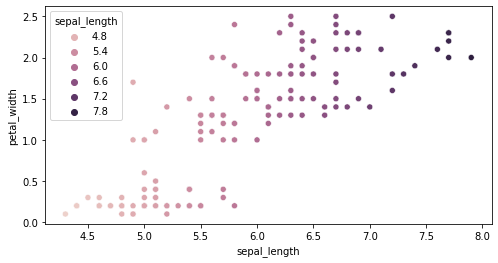

In [37]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'sepal_length', y = 'petal_width',hue='sepal_length', data = data)

In [38]:
data['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: species, dtype: int64

### Data preprocessing

In [39]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['species']=le.fit_transform(data['species'])


In [40]:
data['species'].value_counts()

1    50
2    50
0    49
Name: species, dtype: int64

In [41]:
x = data.drop('species',axis=1)
y = data['species']


In [42]:
print(x.shape)
print(y.shape)

(149, 4)
(149,)


### Separating dataset into training and testing

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 20)


### Modeling

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test  = rf.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_rf_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_rf_test, y_test))


Training accuracy : 1.0
Testing accuracy  : 0.9333333333333333


In [58]:
from sklearn import metrics
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, y_pred_rf_train))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, y_pred_rf_train))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_rf_train)))

print('\n')

print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_rf_test))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred_rf_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf_test)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.0
Mean Absolute Error           : 0.0
Root mean Square Error (RMSE) : 0.0


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.06666666666666667
Mean Absolute Error           : 0.06666666666666667
Root mean Square Error (RMSE) : 0.2581988897471611


The model has 93% accuracy.